<a href="https://colab.research.google.com/github/xMatuszek/polish_receipts/blob/main/receipts_data_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/WongKinYiu/yolov9
%cd yolov9
!pip3 install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 668 (delta 222), reused 199 (delta 199), pack-reused 378
Receiving objects: 100% (668/668), 3.22 MiB | 19.88 MiB/s, done.
Resolving deltas: 100% (269/269), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00


In [ ]:
%cd /content

'/content/yolov9'

In [ ]:
!mkdir -p /content/weights
!wget -P /content/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt

In [ ]:
!pip install ultralytics

ERROR: Operation cancelled by user


In [ ]:
# Load a model
model = YOLO('/content/weights/gelan-c.pt')  # load an official model
model = YOLO('/content/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)


Fusing layers... 
gelan-c summary: 387 layers, 25230943 parameters, 0 gradients, 101.8 GFLOPs



PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 9, 8400), ()) (195.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 85.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 17.9s, saved as '/content/best.onnx' (96.5 MB)

Export complete (26.7s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/best.onnx imgsz=640 data=None  
Visualize:       https://netron.app


'/content/best.onnx'

In [ ]:
!python detect.py --weights /content/best.onnx --source /content/data/test.jpg --save-crop


detect: weights=['/content/best.onnx'], source=/content/data/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.12 torch-2.2.1+cu121 CPU

Loading /content/best.onnx for ONNX Runtime inference...
image 1/1 /content/data/test.jpg: 640x640 1 bottom, 1 logo, 1 products, 1 top, 1 total, 2230.5ms
Speed: 1.9ms pre-process, 2230.5ms inference, 2.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


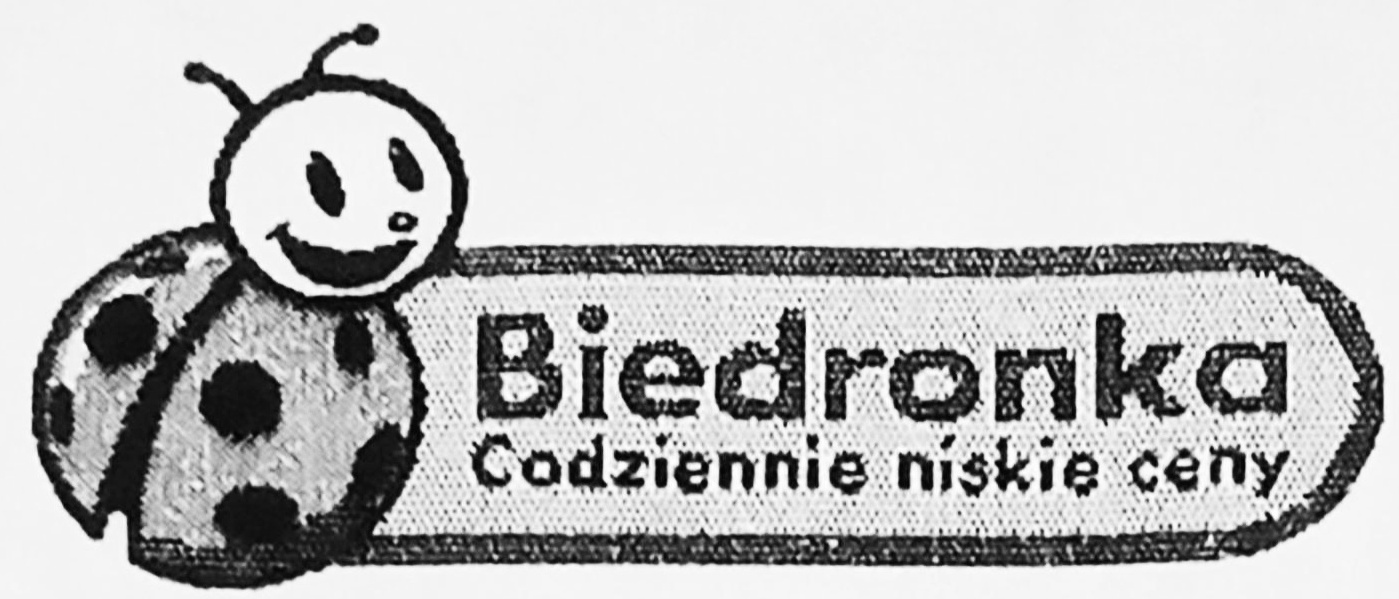

['Biedronka', 'Codziennie niskie ceny']


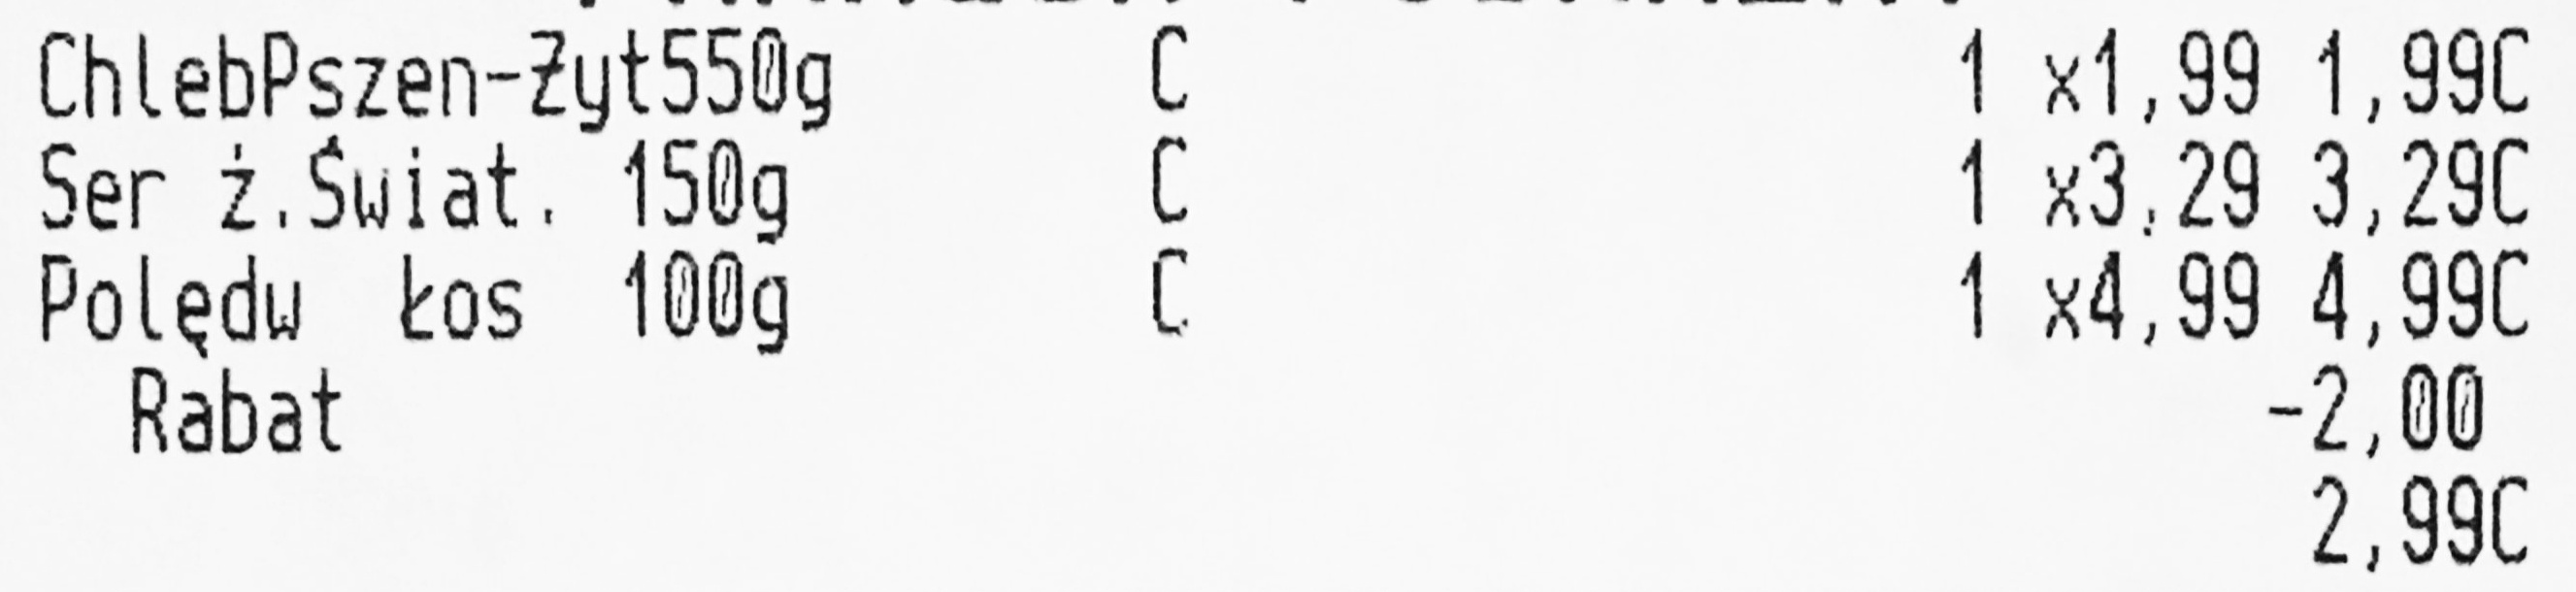

['ChlebPszen-łyt550g', '1 x1,99 1,99C', 'Ser ź Swiat', '{', '1 x3,29 3,29C', 'Polędu', 'kos', '1 x4,99 4,99C', 'Rabat', '~2,00', '2,99C', '150g', '100g']


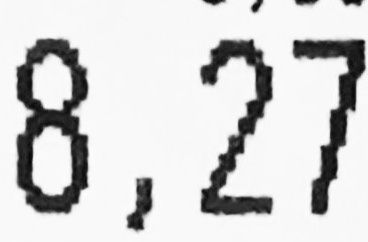

['8,27']


In [134]:
from IPython.display import Image
import os
import easyocr

reader = easyocr.Reader(['pl'])

# Ścieżka do katalogu głównego
katalog_glowny = "/content/yolov9/runs/detect/exp3/crops"

# Lista podkatalogów (oprócz "total")
podkatalogi = ['logo', 'products', 'total']

# Otwarcie pliku wyjściowego w trybie "w"
plik_wyjsciowy = open("wynik_ocr.txt", "w")

# Pętla iterująca po podkatalogach
for podkatalog in podkatalogi:
  # Ścieżka do bieżącego podkatalogu
  sciezka_podkatalogu = os.path.join(katalog_glowny, podkatalog)
  img = os.path.join(sciezka_podkatalogu, "test.jpg")
  img_disp = Image(img)
  display(img_disp)
  result = reader.readtext(img, detail=0)

  # Wyświetlenie tekstu
  print(result)

  # Zapisanie wyniku do pliku
  plik_wyjsciowy.write(f"{podkatalog} = {result}\n")

plik_wyjsciowy.close()



In [ ]:
%%file wynik_ocr.txt